## Credit 

https://medium.com/@tejpal.abhyuday/application-of-gnn-for-calculating-the-solubility-of-molecule-graph-level-prediction-8bac5fabf600

## Predicting molecule solubility using graph neural networks

The goal of using graph-based representations in the `torch_geometric` library is to enable the application of graph neural networks (GNNs) and other graph-based machine learning techniques for tasks such as predicting solubility or other chemical properties. GNNs can operate directly on these graph structures, taking into account the connectivity of atoms and the associated node and edge features to make predictions.

[Source: ChatGPT]

## The ESOL dataset

The ESOL dataset, which stands for "Extended Solubility", is a dataset commonly used in the field of cheminformatics and machine learning for predicting the solubility of chemical compounds. The dataset contains information about the solubility of various organic molecules in water.

1. **Graph Representation**: Each chemical compound is represented as a graph, where atoms are nodes, and chemical bonds are edges. This graph representation captures the connectivity and structure of the molecule.

2. **Node Features**: The node feature vectors, in this case, typically represent the properties of individual atoms within the molecule. These features can include:

   - **Atom Type**: Each atom is assigned a specific atom type based on its element (e.g., carbon, hydrogen, oxygen, etc.). This is often one-hot encoded or represented as a categorical feature.

   - **Atomic Charges**: The partial charges on each atom, which describe the distribution of electric charge within the molecule.

   - **Hybridization**: Information about the hybridization state of each atom (e.g., sp3, sp2, sp).

   - **Atomic Mass**: The mass of each atom.

   - **Formal Charge**: The formal charge on each atom.

   - **Other Atom-specific Properties**: Depending on the specific implementation, additional atom-specific properties may also be included as node features.

3. **Edge Features**: In addition to node features, edge features can be included in the graph representation. These features typically describe the type of chemical bond between connected atoms (e.g., single, double, or triple bonds) and may also include bond distances or bond angles.

4. **Graph Structure**: The graph structure itself is represented by adjacency matrices or edge lists, which define how atoms are connected by chemical bonds.

[Source: ChatGPT]

In [1]:
from torch_geometric.datasets import MoleculeNet
 
# https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.datasets.MoleculeNet.html#torch_geometric.datasets.MoleculeNet
DATA = MoleculeNet(root=".", name="ESOL")
DATA

ESOL(1128)

## Investigate the dataset



In [2]:
print("Dataset type: ", type(DATA))
print("Number of features per graph node: ", DATA.num_features)
print("Number of distinct target values (solubilities): ", DATA.num_classes)
print("Number of graphs: ", len(DATA))
print("Example graph: ", DATA[0])
print("Number of nodes in example graph: ", DATA[0].num_nodes)
print("Number of edges in example graph: ", DATA[0].num_edges)

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Number of features per graph node:  9
Number of distinct target values (solubilities):  734
Number of graphs:  1128
Example graph:  Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])
Number of nodes in example graph:  32
Number of edges in example graph:  68


In [3]:
# nodes of example graph 
DATA[0].x # shape: [num_nodes, num_node_features]

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [4]:
# the target value of the example graph is its solubility
DATA[0].y

tensor([[-0.7700]])

In [5]:
# the edges of the example graph are in sparse Coordinate Format (COO)
# (also called adjacency list: https://distill.pub/2021/gnn-intro/
DATA[0].edge_index.t() # shape [num_edges, 2]

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
        [24, 25],
        [2

In [6]:
# edge attributes of example graph
DATA[0].edge_attr # shape [num_edges, num_edge_features]

tensor([[ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 3,  0,  0],
        [ 3,  0,  0],
        [ 1,  0,  0],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [ 1,  0,  0],
        [ 

## Visualize one of the molecules in the dataset 

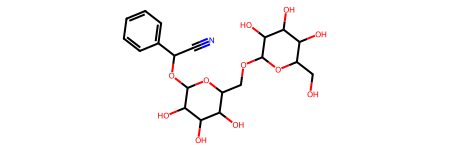

In [7]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

Chem.MolFromSmiles(DATA[0]["smiles"])

## Implement a Graph Convolutional Neural Network

In [8]:
import torch
from torch.nn import Linear
import torch.nn.functional as F 
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

EMBEDDING_DIM = 64

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(42)

        self.initial_conv = GCNConv( # The graph convolutional operator from the “Semi-supervised Classification with Graph Convolutional Networks” paper
          in_channels=DATA.num_features, # number of features per node of graph before transformation
          out_channels=EMBEDDING_DIM # number of features per node of graph after transformation
        )
        self.conv1 = GCNConv(EMBEDDING_DIM, EMBEDDING_DIM)
        self.conv2 = GCNConv(EMBEDDING_DIM, EMBEDDING_DIM)
        self.conv3 = GCNConv(EMBEDDING_DIM, EMBEDDING_DIM)
        self.out = Linear(
          in_features=EMBEDDING_DIM*2, # we stack the different global pooling aggregations below
          out_features=1
        )

    def forward(self, x, edge_index, batch_index):
        # First Conv layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.tanh(hidden)

        # Other Conv layers
        hidden = self.conv1(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv2(hidden, edge_index)
        hidden = F.tanh(hidden)
        hidden = self.conv3(hidden, edge_index)
        hidden = F.tanh(hidden)
          
        # Global Pooling (stack different aggregations over nodes of graph)
        hidden = torch.cat([gmp(hidden, batch_index), 
                            gap(hidden, batch_index)], dim=1)

        # Apply a final (linear) classifier.
        out = self.out(hidden)

        return out, hidden

MODEL = GCN()
print(MODEL)
print("Number of parameters: ", sum(p.numel() for p in MODEL.parameters()))

GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  13249


## Train the Graph Convolutional Network 

In [9]:
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

NUM_GRAPHS_PER_BATCH = 64

# Use GPU for training (if available)
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [10]:
def train(model, data):
  model = model.to(DEVICE)

  loss_fn = torch.nn.MSELoss()

  optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

  data_size = len(data)
  train_loader = DataLoader(
    data[:int(data_size * 0.8)], 
    batch_size=NUM_GRAPHS_PER_BATCH, 
    shuffle=True
  )

  for batch in train_loader:
    # Use GPU
    batch.to(DEVICE)  
    # Reset gradients
    optimizer.zero_grad() 
    # Passing the node features and the edge info
    pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch) 
    # Calculating the loss and gradients
    loss = loss_fn(pred, batch.y)     
    loss.backward()  
    # Update using the gradients
    optimizer.step()   
  return loss, embedding

def train_wrapper():
  print("Starting training...")
  losses = []
  for epoch in range(2000): 
      loss, h = train(MODEL, DATA)
      losses.append(loss)
      if epoch % 100 == 0: 
        print(f"Epoch {epoch} | Train Loss {loss}")
  return losses 

LOSSES = train_wrapper()

Starting training...
Epoch 0 | Train Loss 11.665949821472168
Epoch 100 | Train Loss 1.0266482830047607
Epoch 200 | Train Loss 2.4161503314971924
Epoch 300 | Train Loss 0.21653079986572266
Epoch 400 | Train Loss 0.14055132865905762
Epoch 500 | Train Loss 0.3436800539493561
Epoch 600 | Train Loss 0.060888830572366714
Epoch 700 | Train Loss 0.10678458213806152
Epoch 800 | Train Loss 0.23447926342487335
Epoch 900 | Train Loss 0.13027147948741913
Epoch 1000 | Train Loss 0.09288126230239868
Epoch 1100 | Train Loss 0.08742401748895645
Epoch 1200 | Train Loss 0.1677463799715042
Epoch 1300 | Train Loss 0.0401727594435215
Epoch 1400 | Train Loss 0.1080005094408989
Epoch 1500 | Train Loss 0.023777754977345467
Epoch 1600 | Train Loss 0.06994298845529556
Epoch 1700 | Train Loss 0.03386954218149185
Epoch 1800 | Train Loss 0.05925782397389412
Epoch 1900 | Train Loss 0.05499924719333649


## Visualize training loss


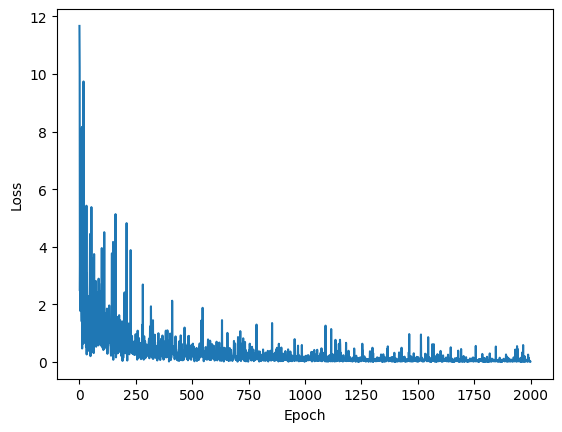

In [11]:
import seaborn as sns

def plot_train_loss(): 
  losses_float = [float(loss.cpu().detach().numpy()) for loss in LOSSES] 
  loss_indices = range(len(losses_float))
  ax = sns.lineplot(x=loss_indices, y=losses_float)
  ax.set(xlabel='Epoch', ylabel='Loss')
  
plot_train_loss()

## Predict solubility on test data and compare with true solubilities

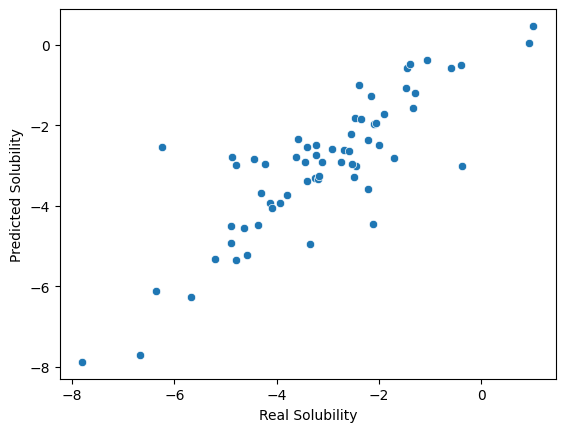

In [12]:
import pandas as pd 

def predict(model, data): 
  data_size = len(data)
  test_loader = DataLoader(
    data[int(data_size * 0.8):], 
    batch_size=NUM_GRAPHS_PER_BATCH, 
    shuffle=True
  )

  # Analyze the results for one batch
  test_batch = next(iter(test_loader))

  with torch.no_grad():
    test_batch.to(DEVICE)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch) 
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()

  df["y_real"] = df["y_real"].apply(lambda row: row[0])
  df["y_pred"] = df["y_pred"].apply(lambda row: row[0])

  axes = sns.scatterplot(data=df, x="y_real", y="y_pred")
  axes.set_xlabel("Real Solubility")
  axes.set_ylabel("Predicted Solubility")

predict(MODEL, DATA)